In [1]:
import numpy as np
import pandas as pd

In [2]:
def mse(y):
    mean = y.mean()
    return np.mean((y - mean)**2)

In [3]:
def gain(root_data, right_data, left_data):
    p = right_data.shape[0] / (right_data.shape[0] + left_data.shape[0])
    return mse(root_data) - p*mse(right_data) - (p-1)*mse(left_data)

In [4]:
def split(X, y, index, t):
    
    left = np.where(X[:, index] <= t)
    right = np.where(X[:, index] > t)
    
    false_data = X[right]
    true_data = X[left]
    
    false_pred = y[right]
    true_pred = y[left]
    
    return false_data, true_data, false_pred, true_pred

In [5]:
def find_best_split(X, y):
    
    min_samples_leaf = 2
    
    best_gain = 0
    best_t = None
    best_index = None
    
    n_features = X.shape[1]
    for index in range(n_features):
        
        t_values = np.unique(X[:, index])
        
        for t in t_values:
            false_data, true_data, false_pred, true_pred  = split(X, y, index, t)
            
            if len(false_data) < min_samples_leaf or len(true_data) < min_samples_leaf:
                continue
                
            current_gain = gain(y, false_pred, true_pred)
            
            if current_gain > best_gain:
                best_gain = current_gain
                best_t = t
                best_index = index
        
    return best_gain, best_t, best_index 

In [6]:
def build_tree(X, y):
    gain, t, index = find_best_split(X, y)
    print(gain, t)
    if gain == 0:
        return Leaf(X, y)
    false_data, true_data, false_pred, true_pred = split(X, y, index, t)
    
    true_branch = build_tree(true_data, true_pred)
    
    false_branch = build_tree(false_data, false_pred)
    
    return Node(index, t, true_branch, false_branch)

In [7]:
class Node:
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index #Индекс признака, по которому мы сравниваем значения с пороговым
        self.t = t #пороговое значение
        self.true_branch = true_branch # Поддерево удовлетворяещее условию 
        self.false_branch = false_branch # Поддерево не удовлетворяещее условию 
    

In [8]:
class Leaf:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.predict = self.y.mean()

In [9]:
from sklearn.datasets import make_regression

In [10]:
X, y = make_regression(n_samples=50, n_features=1, noise=2, random_state=42)

In [11]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, 
                                       y, 
                                       test_size=0.3,
                                       random_state=1)

In [12]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((35, 1), (15, 1), (35,), (15,))

In [13]:
import matplotlib.pyplot as plt

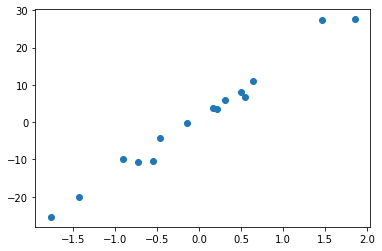

In [14]:
plt.scatter(test_X, test_y)
plt.show()

In [15]:
my_tree = build_tree(train_X, train_y)

274.0381229715157 1.0571222262189157
221.8009279263216 0.7674347291529088
183.41280396867253 0.37569801834567196
156.67634688574253 0.24196227156603412
138.67271445954125 0.11092258970986608
118.8464900248263 -0.013497224737933921
103.32855485788744 -0.22577630048653566
94.70444144004163 -0.23415337472333597
88.23383988217962 -0.3011036955892888
81.37161413959672 -0.46572975357025687
76.39799345409287 -0.5622875292409727
65.28698775868503 -0.6017066122293969
51.93599811714901 -1.0577109289559004
43.39895323527264 -1.2208436499710222
34.306166792938015 -1.4123037013352915
14.786924089193866 -1.7249178325130328
0 None
0 None
0 None
0 None
0 None
0 None
0 None
0 None
0 None
0 None
0 None
0 None
0 None
0 None
0 None
0 None
0 None


In [16]:
def predict(data, tree):
    
    prediction_y = list()
    for obj in data:
        prediction = classify_object(obj, tree)
        prediction_y.append(prediction)
    return prediction_y

In [17]:
def classify_object(obj, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf):
        answer = node.predict
        return answer

    if obj[node.index] <= node.t:
        return classify_object(obj, node.true_branch)
    else:
        return classify_object(obj, node.false_branch)

In [22]:
y_pred_train = predict(train_X, my_tree)

In [23]:
y_pred_test = predict(test_X, my_tree)

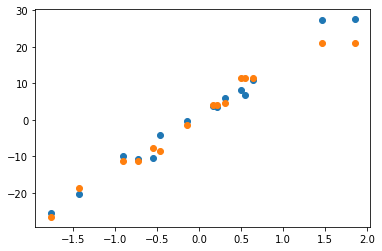

In [58]:
plt.scatter(test_X, test_y)
plt.scatter(test_X, y_pred_test)
plt.show()

In [68]:
y_pred_test = np.array(y_pred_test)

In [73]:
r2_score(test_y, y_pred_test)

0.9534284104232559